In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-771c622d-ac50-adf4-67a4-819c9a98dd38)


In [3]:
!unrar x "/content/drive/MyDrive/data/Defect-Detection-for-PCB.rar"

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Extracting  Defect-Detection-for-PCB/Albumentation_PCB/yolo_annotations/10_short_01_6_600x600.txt      58%  OK 
Extracting  Defect-Detection-for-PCB/Albumentation_PCB/yolo_annotations/10_short_01_7_600x600.txt      58%  OK 
Extracting  Defect-Detection-for-PCB/Albumentation_PCB/yolo_annotations/10_short_01_8_600x600.txt      58%  OK 
Extracting  Defect-Detection-for-PCB/Albumentation_PCB/yolo_annotations/10_short_01_9_600x600.txt      58%  OK 
Extracting  Defect-Detection-for-PCB/Albumentation_PCB/yolo_annotations/10_short_02_0_600x600.txt      58%  OK 
Extracting  Defect-Detection-for-PCB/Albumentation_PCB/yolo_annotations/10_short_02_10_600x600.txt      58%  OK 
Extracting  Defect-Detection-for-PCB/Albumentation_PCB/yolo_annotations/10_short_02_11_600x600.txt      58%  OK 
Extracting  Defect-Detection-for-PCB/Albumentation_PCB/yolo_annotations/10_short_02_12_600x600

In [4]:
%cd Defect-Detection-for-PCB/yolov5
%pip install -qr requirements.txt  # install

/content/Defect-Detection-for-PCB/yolov5
     |████████████████████████████████| 596 kB 30.8 MB/s 


In [5]:
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-233-g7433d38 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 48.1/78.2 GB disk)


In [6]:
!pip install pyngrok
from pyngrok import ngrok# Open a HTTP tunnel on port 8090
public_url = ngrok.connect(port = '8090')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 36.4 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=3028276f7ce1614c0dc442f34aabfa780aab485adb8f46ba1013e15c7c7937cc
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


Opening tunnel named: http-80-3ef4e78d-2738-4c97-aff6-1b0d6daa7b21


t=2022-05-31T08:20:09+0000 lvl=info msg="no configuration paths supplied"
t=2022-05-31T08:20:09+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
t=2022-05-31T08:20:09+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
t=2022-05-31T08:20:09+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040
t=2022-05-31T08:20:09+0000 lvl=info msg="tunnel session started" obj=tunnels.session
t=2022-05-31T08:20:09+0000 lvl=info msg="client session established" obj=csess id=ad6a15b45106
t=2022-05-31T08:20:09+0000 lvl=info msg=start pg=/api/tunnels id=a3f7d68de69dd1ab
t=2022-05-31T08:20:09+0000 lvl=info msg=end pg=/api/tunnels id=a3f7d68de69dd1ab status=200 dur=324.571µs
t=2022-05-31T08:20:09+0000 lvl=info msg=start pg=/api/tunnels id=4f772a3a9ffa91b3
t=2022-05-31T08:20:09+0000 lvl=info msg=end pg=/api/tunnels id=4f772a3a9ffa91b3 status=200 dur=101.511µs
t=2022-05-31T08:20:09+0000 lvl=info msg=start pg=/api/tunnels id=dcc4ed

In [7]:
# Train YOLOv5
!python train.py --img 608 --batch 16 --epochs 80 --data custom_data.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=80, batch_size=16, imgsz=608, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 44 (delta 31), reused 31 (delta 31), pack-reused 11
Unpacking objects: 100% (44/44), done.
From https://github.com/ultralytics/yolov5
   7433d38..50b886d  master     -> origin/master
 * [new branch]      dependabot/pip/protobuf-lt-4.21.2 -> origin/dependabot/pip/protobu

In [8]:
from utils.plots import plot_results 
plot_results('runs/train/exp/results.csv')  # plot 'results.csv' as 'results.png'

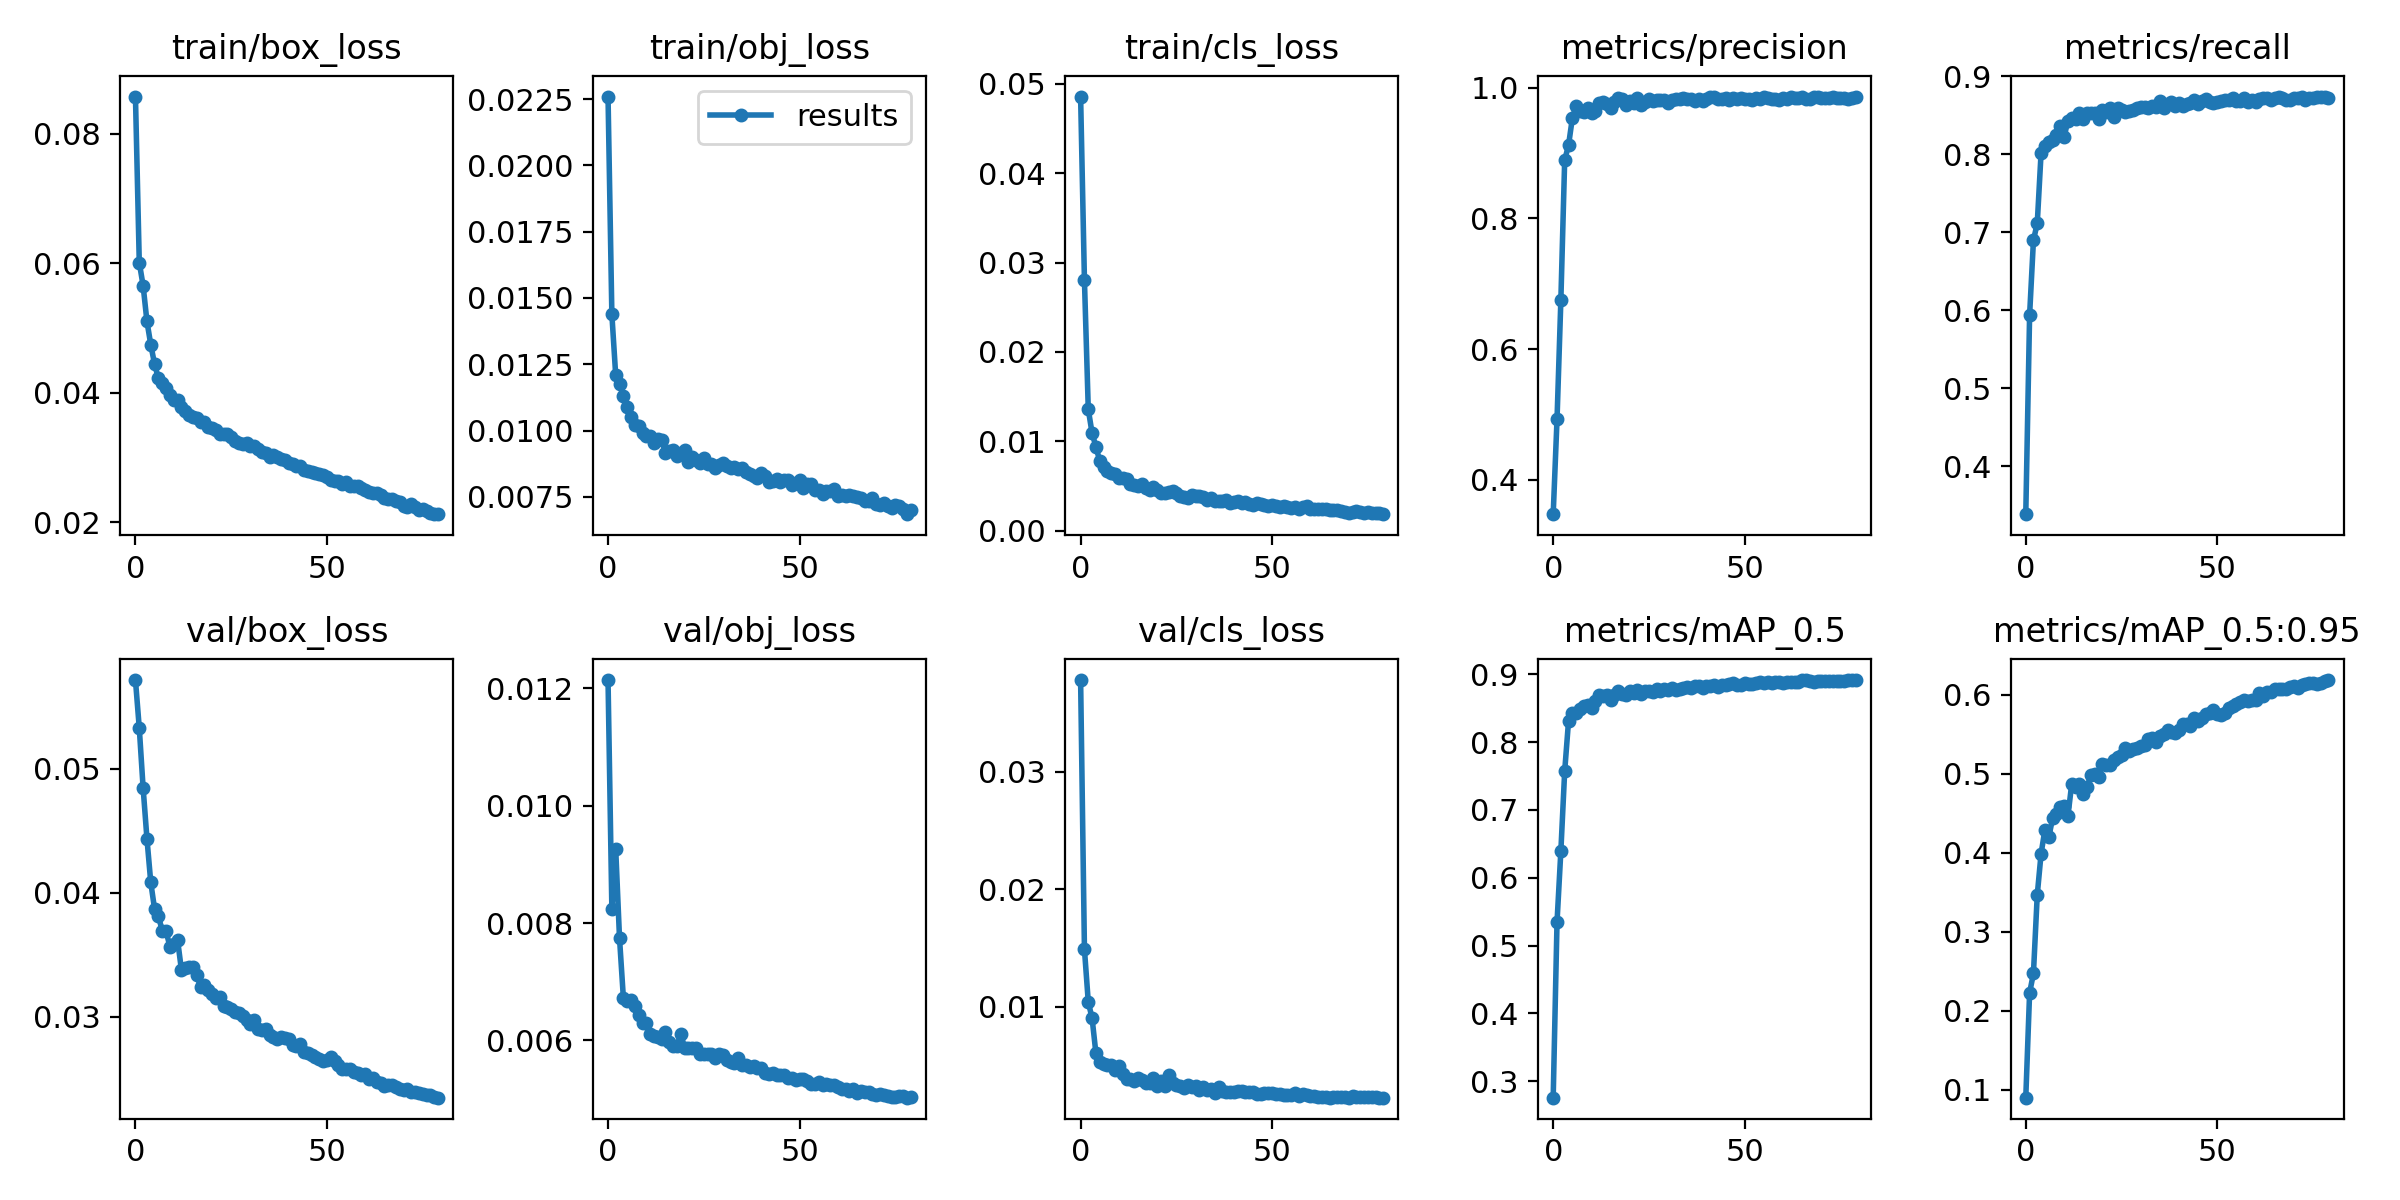

In [10]:
display.Image(f"runs/train/exp/results.png")

In [12]:
!python val.py --weights /content/Defect-Detection-for-PCB/yolov5/runs/train/exp/weights/best.pt --data test.yaml --img 608 --iou 0.65 --half --task test

val: data=/content/Defect-Detection-for-PCB/yolov5/data/test.yaml, weights=['/content/Defect-Detection-for-PCB/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=608, conf_thres=0.001, iou_thres=0.65, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v6.1-233-g7433d38 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning '/content/Defect-Detection-for-PCB/yolov5/../Albumentation_PCB/train_data/labels/test' images and labels...5544 found, 0 missing, 0 empty, 0 corrupt: 100% 5544/5544 [00:14<00:00, 384.17it/s]
test: New cache created: /content/Defect-Detection-for-PCB/yolov5/../Albumentation_PCB/train_data/labels/test.cache
               Class     Images     Labels          P          R     mAP@.

In [13]:
!python detect.py --source /content/Defect-Detection-for-PCB/PCB_DATASET/images/Mouse_bite/01_mouse_bite_01.jpg --weights /content/Defect-Detection-for-PCB/yolov5/runs/train/exp/weights/best.pt

detect: weights=['/content/Defect-Detection-for-PCB/yolov5/runs/train/exp/weights/best.pt'], source=/content/Defect-Detection-for-PCB/PCB_DATASET/images/Mouse_bite/01_mouse_bite_01.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-233-g7433d38 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/Defect-Detection-for-PCB/PCB_DATASET/images/Mouse_bite/01_mouse_bite_01.jpg: 352x640 Done. (0.017s)
Speed: 0.5ms pre-process, 17.2ms inference, 0.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


In [19]:
!python detect.py --source /content/Defect-Detection-for-PCB/Albumentation_PCB/images/01_missing_hole_01_12_600x600.jpg --weights /content/Defect-Detection-for-PCB/yolov5/runs/train/exp/weights/best.pt

detect: weights=['/content/Defect-Detection-for-PCB/yolov5/runs/train/exp/weights/best.pt'], source=/content/Defect-Detection-for-PCB/Albumentation_PCB/images/01_missing_hole_01_12_600x600.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-233-g7433d38 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/Defect-Detection-for-PCB/Albumentation_PCB/images/01_missing_hole_01_12_600x600.jpg: 640x640 2 missing holes, Done. (0.013s)
Speed: 0.5ms pre-process, 12.9ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Results save

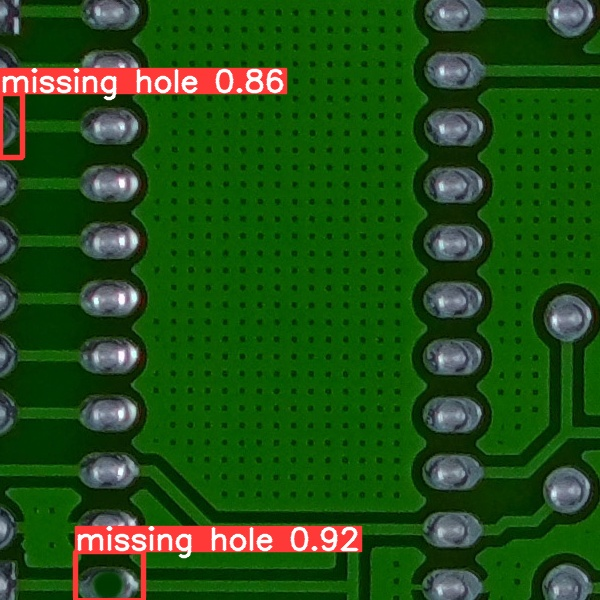

In [20]:
display.Image(f"runs/detect/exp2/01_missing_hole_01_12_600x600.jpg")